In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
from DataSet import *
import os

import sys
sys.path.append("..")
import TargetApplicationScope

%matplotlib notebook

Deutschland


# Compiling/Sampling of Data 

### Random Generation
Coordinates: are randomly generated 
Datetime: points are randomly generated between a range in the past 
Speed: generate based on RoadTypeSampled {todo}

### Multivariate 
Elevation: API generate based on coordinates
Temperature: sampling
RainSensor 

### GTSBD:
SignType: labelled from the dataset






In [2]:
## if not generated!

data_file_path = "data/generated_data1.csv"
exists = os.path.isfile(data_file_path)
if exists:
    # Store configuration file values
    print("File exists")
    data_set = pd.read_csv(data_file_path)
else:
    print("File does not exist")
    data_set = generate_dataset(data_file_path)
    data_set.to_csv("data/generated_data.csv")

File exists


In [3]:
t = TargetApplicationScope.TargetApplicationScope()
lookup_table = t.__dict__
appropriate_test_cases = 5

In [4]:
selected_sample = 2000
chosen_idx = np.random.choice(selected_sample, replace=False, size=selected_sample)
df_trimmed = data_set.iloc[chosen_idx]
print(df_trimmed.describe())


        Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
count  2000.000000   2000.000000     2000.000000       2000.000000   
mean    999.500000    999.500000      999.500000        999.500000   
std     577.494589    577.494589      577.494589        577.494589   
min       0.000000      0.000000        0.000000          0.000000   
25%     499.750000    499.750000      499.750000        499.750000   
50%     999.500000    999.500000      999.500000        999.500000   
75%    1499.250000   1499.250000     1499.250000       1499.250000   
max    1999.000000   1999.000000     1999.000000       1999.000000   

            Width       Height       Roi.X1       Roi.Y1       Roi.X2  \
count  2000.00000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     47.22250    47.860000     5.815500     5.839000    41.774000   
std      20.09308    20.268147     1.139346     1.160928    19.215164   
min      25.00000    26.000000     5.000000     5.000000    20.000000   
25% 

# Coverage/Sufficiency aspects

### Range-based Parameters
Verifies parameters fit between the TAS application_scope {min/max_values}



In [5]:
## Range related parameters: just checking min & max
def return_min_max(column):
    """ returns the max & min on column [min, max]"""
    return [min(column), max(column)]


def check_range(tas_parms, column, sufficency = 0 ):
    min_max = return_min_max(column)
    for key in tas_parms:
        if "min" in key:
            if tas_parms[key] <= min_max[0]:
                sufficency = sufficency + 0.5
        if "max" in key:
            if tas_parms[key] >= min_max[1]:
                sufficency = sufficency + 0.5
    return sufficency

In [6]:
def validate_range_based_params(data, test_cases):
    """
     Range-based:
    + temperatureRange(temperature, min_temp, max_temp):
    + velocityRange(min_velocity, max_velocity)
    + rainSensorRange(min_rain, max_rain): TODO:
    + elevationSensorRange(min_elevation, max_elevation)
    + yearRange(year, timestamp)
    """
    #  + velocityRange(min_velocity, max_velocity)
    validation = check_range(lookup_table['temperature'], data['Temperature']) + \
                 check_range(lookup_table['velocity'], data['Speed'] ) +\
                 check_range(lookup_table['elevation'], data['Elevation']) 
            
    return validation/test_cases

validate_range_based_params(df_trimmed, 3)

KeyError: 'Elevation'

## Density-Based Parameters 

### Coordinates
-- plots Density Based Coordinates
-- verifies there are neighbors within 4km squared {how many neighbors?}
@todo: need to add that they are along the border of Germany


In [5]:
import geopandas as gpd
import shapely
import pandas as pd
import geopandas
from shapely.geometry import Point
from geopy import distance
import mplleaflet


def plot_coordinates(show_map):
    data_set['Coordinates_Joined'] = list(zip(data_set.Longitude, data_set.Latitude))
    
    gdf = geopandas.GeoDataFrame(df_trimmed, geometry=data_set['Coordinates_Joined'].apply(Point))
    germany_plot = gpd.read_file("shp/Germanyboundary87.shp")
    ax = germany_plot.plot(
        color='white', edgecolor='black', figsize=(10, 10))
    gdf.plot(ax=ax, color='blue',alpha=0.3)
    if show_map: 
         mplleaflet.show(fig = ax.figure)
    
    
plot_coordinates(show_map=True)


[15.0419319, 5.8663153]
2000


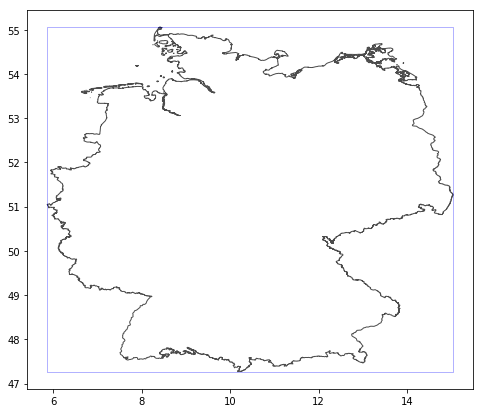

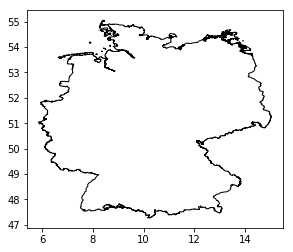

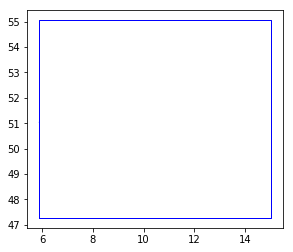

In [62]:
from shapely.geometry import Polygon, LineString


def generate_boundaries():
    germany_plot = gpd.read_file("shp/Germanyboundary87.shp")
    hulls = germany_plot["geometry"].convex_hull
    bounds = germany_plot.bounds['maxx']
    envelope = geopandas.GeoSeries(hulls.envelope)
    x_values = [float(germany_plot.bounds['maxx']), float(germany_plot.bounds['minx'])]
    y_values = [float(germany_plot.bounds['maxy']), float(germany_plot.bounds['miny'])]
    return x_values, y_values


boundaries = generate_boundaries()
x_boundaries = boundaries[0]
y_boundaries = boundaries[1]
print(x_boundaries)
print(y_boundaries)

count = 0 
for value in sorted(df_trimmed.Longitude):
    #print(value)
    if value < x_boundaries[0]:
        count = count+1 

print(count)


data_set['Coordinates_Joined'] = list(zip(data_set.Longitude, data_set.Latitude))
gdf = geopandas.GeoDataFrame(df_trimmed, geometry=envelope)
ax = germany_plot.plot(
        color='white', edgecolor='black', figsize=(8, 8))
gdf.plot(ax=ax, color='white',alpha=0.3, edgecolor="blue")

germany_plot.plot(color="white", edgecolor="black")

## these are the parameters

envelope.plot(ax=germany_plot.plot(), color="white", edgecolor="blue")
plt.show()


# l_north = LineString([78.65, -32.65], [-98.65, 12.65])
# g_aaa = GeoSeries(l_north)

# def plot_coordinates(show_map):    
#     ax = germany_plot.plot(
#         color='white', edgecolor='black', figsize=(7, 7))
#     #gdf.suptitle = "Germany with points"
#     gdf.plot(ax=ax, color='blue',alpha=0.3 )
    
#     #gdf.plot(ax=df1)
#     if show_map: 
#          mplleaflet.show(fig = ax.figure)
    
    
# #plot_coordinates(show_map=False)
# ax_1= envelope.plot(
#         color='white', edgecolor='black', figsize=(7, 7))
# gdf.plot(ax=ax_1, color='blue',alpha=0.3 )



                                      


[15.0419319, 5.8663153]
[55.0586617, 47.2701114]


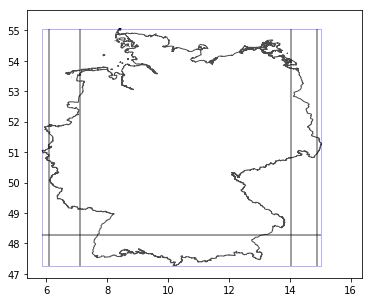

In [125]:
from shapely.geometry import Polygon, LineString


def generate_boundaries():
    germany_plot = gpd.read_file("shp/Germanyboundary87.shp")
    hulls = germany_plot["geometry"].convex_hull
    bounds = germany_plot.bounds['maxx']
    envelope = geopandas.GeoSeries(hulls.envelope)
    x_values = [float(germany_plot.bounds['maxx']), float(germany_plot.bounds['minx'])]
    y_values = [float(germany_plot.bounds['maxy']), float(germany_plot.bounds['miny'])]
    return x_values, y_values


boundaries = generate_boundaries()
x_boundaries = boundaries[0]
y_boundaries = boundaries[1]
print(x_boundaries)
print(y_boundaries)


## [Polygon([(x,x), (2,0), (2,2), (0,2)])
polys2 = geopandas.GeoSeries([LineString([[6.09663153, 47.2701114], [6.0966315, 55.0586617]]), LineString([[7.0966315, 47.2701114], [7.0966315, 55.0586617]]),
                             LineString([[14.0419319, 47.2701114], [14.0419319, 55.0586617]]), 
                             LineString([[14.9, 47.2701114], [14.9, 55.0586617]])])

polys3 = geopandas.GeoSeries([LineString([[5.8663153, 48.2701114], [15.0419319, 48.2701114]]),
                              LineString([[15.8663153, 55.2701114], [15.8663153, 55.2701114]])
                             ])




df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1, 2, 3, 4]})
df3 = geopandas.GeoDataFrame({'geometry': polys3, 'df3':[1,2]})

gdf = geopandas.GeoDataFrame(df_trimmed, geometry=envelope)
ax = germany_plot.plot(
        color='white', edgecolor='black', figsize=(6, 6))
gdf.plot(ax=ax, color='white',alpha=0.3, edgecolor="blue")
df2.plot(ax=ax, color='black', alpha=0.5)
df3.plot(ax=ax, color='black', alpha=0.5)



## Neighbors within 4km distance

uses the KDTree with the Haversine & KD tree 
@ToDo: Needs to be optimised



In [95]:

gdf.plot(ax=ax)

TypeError: 'module' object is not subscriptable

In [8]:
## HAVERSINE & KD TREE
# @todo: fix strategy
import numpy as np
from scipy.spatial import cKDTree

tree = cKDTree(list(df_trimmed['Coordinates_Joined']))
dist = 4
for x in df_trimmed['Coordinates_Joined']:
    ix = tree.query_ball_point(x, dist)
    if len(ix) < 1:
        print("No points")
    else: 
        print(str(x)+ "Has" + str(len(ix)) + "Neighbors")


def find_neighbours_within_radius(xy, radius):
    tree = cKDTree(xy)
    within_radius = tree.query_ball_tree(tree, r=radius)
    return within_radius

def flatten_nested_list(nested_list):
    return [item for sublist in nested_list for item in sublist]

def total_neighbours_within_radius(xy, radius):
    neighbours = find_neighbours_within_radius(xy, radius)
    return len(flatten_nested_list(neighbours))


(13.80248554, 51.01024392)Has722Neighbors
(7.562098408, 54.10396453)Has643Neighbors
(6.18519601, 47.260547499999994)Has523Neighbors
(7.912374069, 54.95716766)Has567Neighbors
(9.829076701, 50.62875985)Has1351Neighbors
(13.92980413, 54.6752359)Has405Neighbors
(13.68385876, 53.52390548)Has549Neighbors
(10.38972123, 47.10216827)Has939Neighbors
(7.03433304, 50.08773468)Has911Neighbors
(13.6339016, 52.83717272)Has627Neighbors
(13.55788097, 54.24822196)Has494Neighbors
(13.83726439, 48.06376601)Has582Neighbors
(13.77885824, 50.68919671)Has715Neighbors
(10.12129135, 49.23093115)Has1311Neighbors
(9.672342124, 50.61313248)Has1347Neighbors
(7.794431349, 47.39632232)Has753Neighbors
(9.265164963, 47.89933563)Has1038Neighbors
(12.312581699999999, 51.695541600000006)Has994Neighbors
(8.419963159, 53.11148927)Has919Neighbors
(7.19051324, 50.09496144)Has944Neighbors
(13.02157787, 47.08411754)Has596Neighbors
(12.11513136, 46.57917263)Has636Neighbors
(7.7547508689999995, 50.63360431)Has1037Neighbors
(8.558

(8.211033215, 54.63437019)Has640Neighbors
(6.479570102, 53.68131963)Has546Neighbors
(9.984179677, 49.34509859)Has1331Neighbors
(7.469909392000001, 54.71355848)Has562Neighbors
(9.459245422, 46.80701299)Has853Neighbors
(10.95871859, 53.75412233)Has876Neighbors
(6.896038784, 47.76302035)Has686Neighbors
(7.573399031, 54.28818849)Has617Neighbors
(9.581679599, 54.7879497)Has738Neighbors
(9.017362317, 49.69585988)Has1262Neighbors
(13.81399142, 50.54240423)Has701Neighbors
(10.78480218, 46.73599242)Has815Neighbors
(11.30892439, 48.53830366)Has1065Neighbors
(8.022568473, 51.91774965)Has1019Neighbors
(12.26237885, 49.76048606)Has1040Neighbors
(8.503114672, 52.29184066)Has1057Neighbors
(8.976466508, 52.91567190000001)Has1030Neighbors
(7.129807992000001, 48.32927274)Has807Neighbors
(9.911280638, 46.31243783)Has786Neighbors
(10.62002725, 46.70453879)Has832Neighbors
(7.67924708, 51.33485796)Has1029Neighbors
(7.880591014, 46.97900818)Has700Neighbors
(10.16521798, 51.80662566)Has1286Neighbors
(10.62850

(13.46707435, 49.14841715)Has740Neighbors
(7.615147767000001, 51.48001082)Has1000Neighbors
(6.221549871000001, 51.14992094)Has743Neighbors
(9.27729854, 50.58262677)Has1307Neighbors
(11.32989634, 47.37360007)Has885Neighbors
(10.65152753, 46.47446338)Has778Neighbors
(7.39876061, 49.66092186)Has975Neighbors
(9.43253461, 50.34338822)Has1330Neighbors
(9.064884923, 54.23367217)Has799Neighbors
(11.25337611, 54.43492114)Has746Neighbors
(9.429900676, 46.87039676)Has862Neighbors
(9.227033968999999, 48.14028782)Has1073Neighbors
(11.296478599999999, 53.242672600000006)Has928Neighbors
(10.97748569, 46.29211692)Has724Neighbors
(12.926587, 46.76392738)Has566Neighbors
(11.67179546, 50.229252200000005)Has1174Neighbors
(10.701350900000001, 50.27242201)Has1302Neighbors
(8.501736426, 51.24215419)Has1178Neighbors
(7.050566872, 51.85358343)Has856Neighbors
(10.02860266, 52.29228318)Has1229Neighbors
(11.45625274, 46.1560837)Has650Neighbors
(9.394640176000001, 46.16448501)Has728Neighbors
(10.96890025, 46.90360

(11.56559395, 47.53530957)Has871Neighbors
(6.301237062, 50.43434076)Has769Neighbors
(8.489786976, 48.28402531)Has1001Neighbors
(12.68209216, 49.33696916)Has919Neighbors
(7.977797969, 53.90371102)Has730Neighbors
(9.622996721, 54.54787005)Has790Neighbors
(9.555595501, 51.79239582)Has1268Neighbors
(7.346065814, 53.99342114)Has637Neighbors
(11.35072237, 50.567691499999995)Has1216Neighbors
(12.89642712, 54.78824087)Has504Neighbors
(10.74219035, 47.84927427)Has1034Neighbors
(11.42233595, 50.39557277)Has1217Neighbors
(13.50117642, 50.71611815)Has786Neighbors
(12.26473232, 52.73534262)Has873Neighbors
(13.41491734, 49.58659077)Has784Neighbors
(9.947122616, 48.69852129)Has1243Neighbors
(8.44669308, 51.97539888)Has1093Neighbors
(9.063744454, 53.1874963)Has997Neighbors
(10.36405999, 53.4438171)Has1004Neighbors
(7.59195631, 49.22802802)Has963Neighbors
(8.776794718, 52.88531113)Has1009Neighbors
(6.864818562000001, 53.34104549)Has667Neighbors
(11.61431682, 54.28780241)Has723Neighbors
(9.80025816, 46.

# Density-Based Parameters 

### Datetime

### count of the intervals and missing data

In [25]:
from datetime import datetime

## uses the full data set -> rather than the trimmed
def count_of_underthreshold(time_range, df, count):
    resample = df.resample(time_range).count()
    return len(resample[resample['Filename'] <= count])


data_set['Timestamp'] =  pd.to_datetime(data_set['Datetime'], unit='s')
data_set.index = data_set['Timestamp']


In [27]:
# 60 minutes {60 minutes, 1 value}
print(count_of_underthreshold('60T', full_data_set, 1))

# 120 minutes 
print(count_of_underthreshold('120T', full_data_set, 1))

## 240 minutes 
print(count_of_underthreshold('240T', full_data_set, 1))


4904
7048
899
38


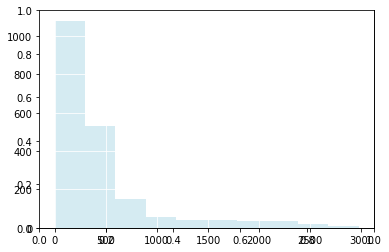

In [30]:
## Distribution -> https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
## Elevation of Germany 

fig, ax = plt.subplots()

ax = fig.add_subplot(111)
ax.grid(color='white', linestyle='solid')

x = np.random.normal(size=1000)
ax.hist(df_trimmed['Elevation'], histtype='stepfilled', fc='lightblue', alpha=0.5);


# Representativeness aspects

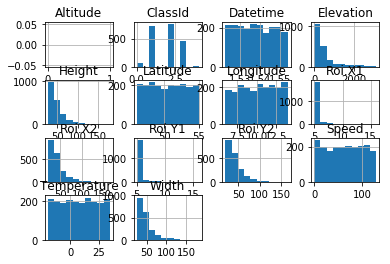

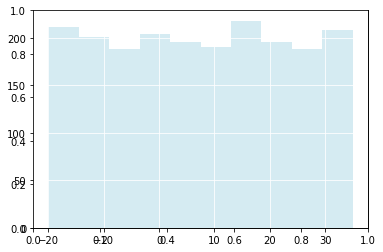

In [10]:
## can use some of the Weather sampling code
df_trimmed.hist()


fig, ax = plt.subplots()

ax = fig.add_subplot(111)
ax.grid(color='white', linestyle='solid')

x = np.random.normal(size=1000)
ax.hist(df_trimmed['Temperature'], histtype='stepfilled', fc='lightblue', alpha=0.5);



ModuleNotFoundError: No module named 'figures'